In [1]:
import os, glob
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
geo = 'HCAEmbryonicHindlimb'
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_unzip = os.path.join(pth_data, 'unzip', geo)
pth_out = os.path.join(pth_data, 'processed')
pth_fig = os.path.join(pth, 'figures', 'preprocessing')

In [ ]:
df_summary = pd.read_csv(os.path.join(pth_data, 'summary.csv'), index_col = 0)
df_summary = df_summary.loc[geo].copy(); df_summary

,Source,Name,Study,Species,Trajectory,Age,Description
4,HCAEmbryonicHindlimb,Embryonic Hindlimb,"Zhang et al., 2024",hsapiens,True,PCW5-9,Embryonic hindlimb atlas focusing on spatial a...


In [4]:
fn = glob.glob(os.path.join(pth_unzip, '*Limb*.h5ad'))[0]
adata = sc.read_h5ad(fn); adata

AnnData object with n_obs × n_vars = 125955 × 26522
    obs: 'batch', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'leiden', 'S_score', 'G2M_score', 'phase', 'leiden_R', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variableWSSS_THYst8796437', 'highly_variableWSSS_THYst8796442', 'highly_variable5478STDY7935101', 'highly_variable5478STDY7935102', 'highly_variableWSSS_THYst8796439', 'highly_variableWSSS_THYst9384956', 'highly_variable5478STDY7717491', 'highly_variableWSSS_THYst9384953', 'highly_variable5478STDY7717492', 'highly_variableWSSS_THYst9384955', 'highly_variable5386STDY7537944', 'highly_variableWSSS_THYst9384954', 'highly_variableFCAImmP7536759', 'highly_variable5478STDY7980349', 'highly_variableWSSS_THYst8796438', 'highly_variable5478STDY7652318', 'highly_variableWSSS_THYst8796441', 'highly_variableFCAImmP7536758', 'highly_variableWSSS_THYst9384957', 'highly_variable5478STDY7980348', 'h

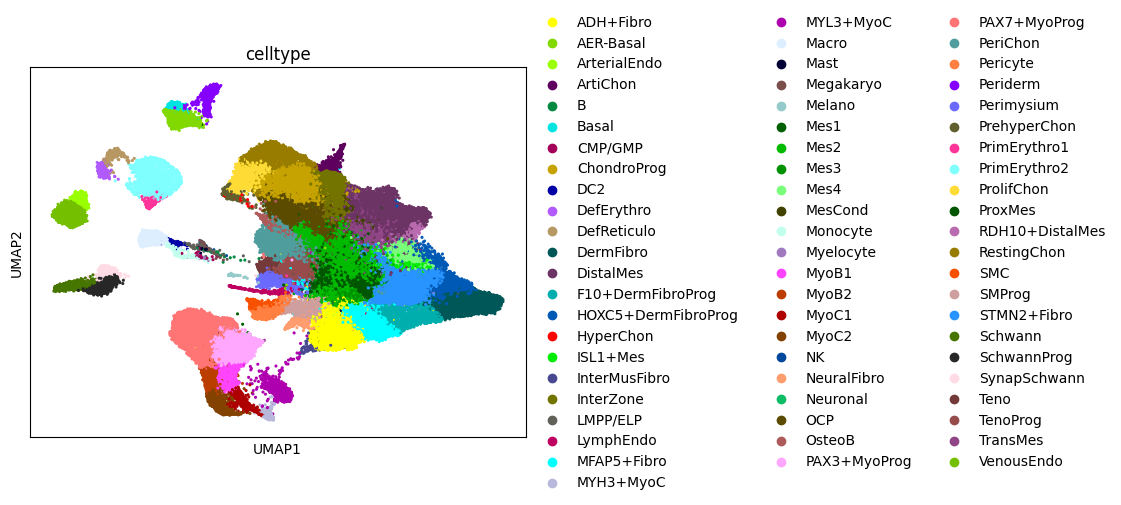

In [5]:
sc.pl.umap(adata, color = 'celltype', size = 20)

In [6]:
celltype_dict = {
    'ProxMes'             : 'Limb Mesenchyme',
    'Mes1'                : 'Limb Mesenchyme',
    'Mes2'                : 'Limb Mesenchyme',
    'Mes3'                : 'Limb Mesenchyme',
    'Mes4'                : 'Limb Mesenchyme',
    'ISL1+Mes'            : 'Limb Mesenchyme',
    'TransMes'            : 'Limb Mesenchyme',
    'RDH10+DistalMes'     : 'Limb Mesenchyme',
    'DistalMes'           : 'Limb Mesenchyme',
    'MesCond'             : 'Osteochondral',
    'OCP'                 : 'Osteochondral',
    'ChondroProg'         : 'Osteochondral',
    'RestingChon'         : 'Osteochondral',
    'ProlifChon'          : 'Osteochondral',
    'PrehyperChon'        : 'Osteochondral',
    'HyperChon'           : 'Osteochondral',
    'ArtiChon'            : 'Osteochondral',
    'OsteoB'              : 'Osteochondral',
    'PeriChon'            : 'Osteochondral',
    'InterZone'           : 'Osteochondral',
    'TenoProg'            : 'Tendon',
    'Teno'                : 'Tendon',
    'Perimysium'          : 'Tendon',
    'InterMusFibro'       : 'Limb Fibroblast',
    'ADH+Fibro'           : 'Limb Fibroblast',
    'STMN2+Fibro'         : 'Limb Fibroblast',
    'MFAP5+Fibro'         : 'Limb Fibroblast',
    'HOXC5+DermFibroProg' : 'Limb Fibroblast',
    'F10+DermFibroProg'   : 'Limb Fibroblast',
    'DermFibro'           : 'Limb Fibroblast',
    'Pericyte'            : 'Smooth Muscle',
    'SMProg'              : 'Smooth Muscle',
    'SMC'                 : 'Smooth Muscle',
    'NeuralFibro'         : 'Smooth Muscle'}

adata.obs['celltype_original'] = adata.obs.celltype.copy()
adata.obs['celltype'] = adata.obs.celltype_original.map(celltype_dict).astype('category')

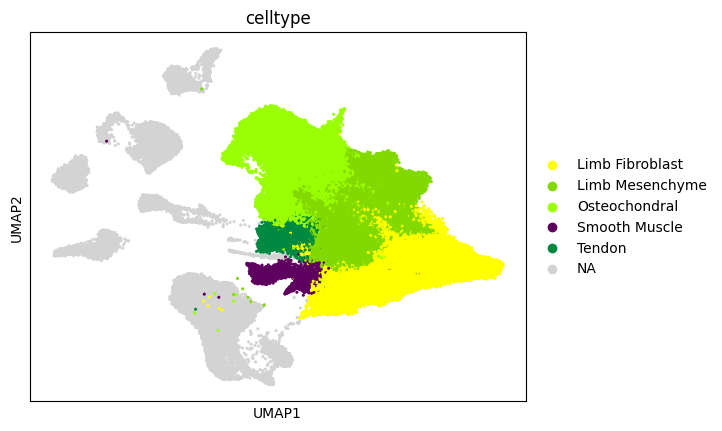

In [7]:
sc.pl.umap(adata, color = 'celltype', size = 20)

In [8]:
adata = adata[~adata.obs.celltype.isna()].copy()
adata

AnnData object with n_obs × n_vars = 102324 × 26522
    obs: 'batch', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'leiden', 'S_score', 'G2M_score', 'phase', 'leiden_R', 'celltype', 'celltype_original'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variableWSSS_THYst8796437', 'highly_variableWSSS_THYst8796442', 'highly_variable5478STDY7935101', 'highly_variable5478STDY7935102', 'highly_variableWSSS_THYst8796439', 'highly_variableWSSS_THYst9384956', 'highly_variable5478STDY7717491', 'highly_variableWSSS_THYst9384953', 'highly_variable5478STDY7717492', 'highly_variableWSSS_THYst9384955', 'highly_variable5386STDY7537944', 'highly_variableWSSS_THYst9384954', 'highly_variableFCAImmP7536759', 'highly_variable5478STDY7980349', 'highly_variableWSSS_THYst8796438', 'highly_variable5478STDY7652318', 'highly_variableWSSS_THYst8796441', 'highly_variableFCAImmP7536758', 'highly_variableWSSS_THYst9384957', 'highly_variabl

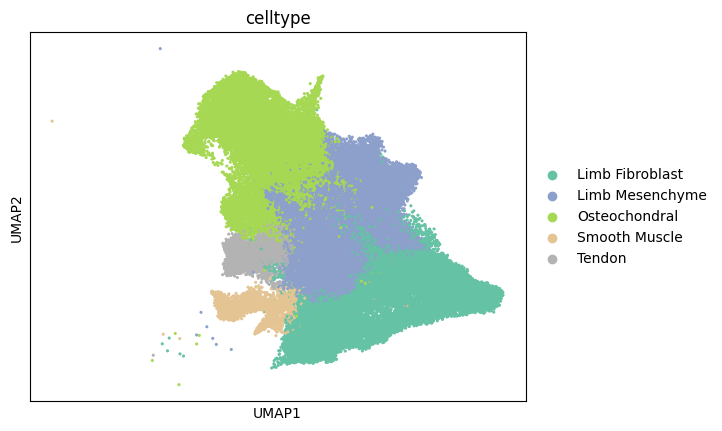

In [9]:
sc.pl.umap(adata, color = 'celltype', palette = 'Set2', size = 20)

In [10]:
adata.write(os.path.join(pth_out, f'{geo}.h5ad'))

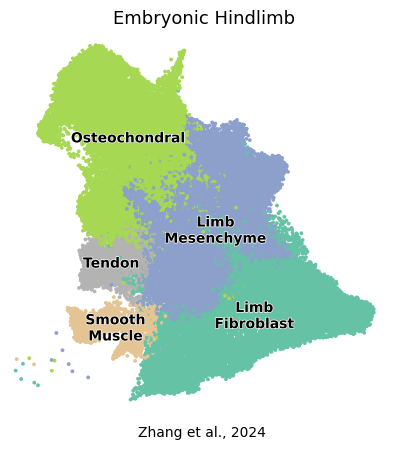

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata, color = 'celltype', size = 30,
           legend_loc = 'on data', legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
ylim = ax.get_ylim()
ax.set_xlim(left = ax.get_xlim()[0] + 6)
ax.set_ylim(ylim[0] + 1, ylim[1] - 1.5)

label_dict = {
    'Limb Mesenchyme' : 'Limb\nMesenchyme',
    'Limb Fibroblast' : 'Limb\nFibroblast',
    'Smooth Muscle'   : 'Smooth\nMuscle'}

pos_dict = {
    'Limb Mesenchyme' : (.8, .2),
    'Limb Fibroblast' : (1, 0)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(df_summary.Name, size = 13)
ax.text(.33, -.05, df_summary.Study, transform = ax.transAxes)
fn = os.path.join(pth_fig, 'processed', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')